In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms

In [2]:
use_cuda = True
device = torch.device("cuda" if use_cuda else "cpu")

In [3]:
from urllib.request import urlretrieve
import json

imagenet_json, _ = urlretrieve("https://www.anishathalye.com/media/2017/07/25/imagenet.json")
with open(imagenet_json) as f:
  imagenet_labels = json.load(f)

In [4]:
print(imagenet_labels[18])

magpie


In [5]:
preprocess = transforms.Compose([
                                 transforms.Resize(256),
                                 transforms.CenterCrop(224),
                                 transforms.ToTensor() # transform to the torch.Tensor form, [0, 255] -> [0, 1]
])

In [6]:
import matplotlib.pyplot as plt
import PIL

In [7]:
def image_loader(path):
  image = PIL.Image.open(path)
  image = preprocess(image).unsqueeze(0)
  return image.to(device, torch.float)

In [8]:
url = "https://3.bp.blogspot.com/-W__wiaHUjwI/Vt3Grd8df0I/AAAAAAAAA78/7xqUNj8ujtY/s1600/image02.png" # I used a random image
image_path, _ = urlretrieve(url)
image = image_loader(image_path)

In [9]:
def imshow(tensor):
  image = tensor.cpu().clone() # matplot library is based on cpu
  image = image.squeeze(0)
  image = transforms.ToPILImage()(image) # transform to the PIL
  plt.imshow(image)

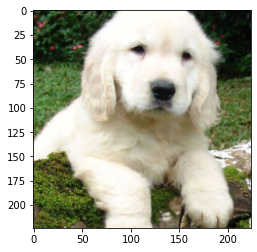

In [10]:
plt.figure()
imshow(image) #224x224

In [11]:
# Normalize the input
class Normalize(nn.Module):
  def __init__(self, mean, std):
    super(Normalize, self).__init__()
    self.register_buffer('mean', torch.Tensor(mean))
    self.register_buffer('std', torch.Tensor(std))

  def forward(self, input):
    mean = self.mean.reshape(1, 3, 1, 1)
    std = self.std.reshape(1, 3, 1, 1)
    return (input - mean) / std

In [12]:
model = nn.Sequential(
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, .225]),
    torch.hub.load('pytorch/vision:v0.6.0', 'resnet18', pretrained=True)
).to(device).eval()

Downloading: "https://github.com/pytorch/vision/archive/v0.6.0.zip" to /root/.cache/torch/hub/v0.6.0.zip
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

In [13]:
outputs = model(image)
percentages = torch.nn.functional.softmax(outputs, dim=1)[0] * 100
print("top-5 classes")
for i in outputs[0].topk(5)[1]: # [0]: values, [1]: indices
  print(f"index: {i.item()} / class: {imagenet_labels[i]} / percentage: {round(percentages[i].item(), 2)}%")

top-5 classes
index: 207 / class: golden retriever / percentage: 49.98%
index: 222 / class: kuvasz / percentage: 28.83%
index: 257 / class: Great Pyrenees / percentage: 14.49%
index: 267 / class: standard poodle / percentage: 2.31%
index: 216 / class: clumber, clumber spaniel / percentage: 1.26%
